In [1]:
#import packages & libraries
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import requests

In [2]:
def daily_price_historical(symbol, comparison_symbol, all_data=True, limit=1, aggregate=1, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    if all_data:
        url += '&allData=true'
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.fromtimestamp(d) for d in df.time]
    return df

In [3]:
df = daily_price_historical('BTC','USD')

df.head(10)

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,timestamp
0,1279324800,0.04951,0.04951,0.04951,20.00,0.9902,0.04951,direct,,2010-07-17
1,1279411200,0.08585,0.05941,0.04951,75.01,5.0920,0.08584,direct,,2010-07-18
2,1279497600,0.09307,0.07723,0.08584,574.00,49.6600,0.08080,direct,,2010-07-19
3,1279584000,0.08181,0.07426,0.08080,262.00,20.5900,0.07474,direct,,2010-07-20
4,1279670400,0.07921,0.06634,0.07474,575.00,42.2600,0.07921,direct,,2010-07-21
5,1279756800,0.08181,0.05050,0.07921,2160.00,129.7800,0.05050,direct,,2010-07-22
6,1279843200,0.06767,0.05050,0.05050,2402.50,141.0700,0.06262,direct,,2010-07-23
7,1279929600,0.06161,0.05049,0.06262,496.32,26.7300,0.05454,direct,,2010-07-24
8,1280016000,0.05941,0.05050,0.05454,1551.48,85.0600,0.05050,direct,,2010-07-25
9,1280102400,0.05600,0.05000,0.05050,877.00,46.9100,0.05600,direct,,2010-07-26


In [5]:
df.tail(10)

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,timestamp
4614,1677974400,22632.51,22240.41,22351.08,20845.84,4.677936e+08,22433.65,direct,,2023-03-05
4615,1678060800,22596.13,22304.69,22433.65,27062.82,6.069781e+08,22410.34,direct,,2023-03-06
4616,1678147200,22540.33,21965.95,22410.34,38868.93,8.645237e+08,22200.87,direct,,2023-03-07
4617,1678233600,22261.89,21643.55,22200.87,41189.49,9.064024e+08,21707.57,direct,,2023-03-08
4618,1678320000,21820.94,20120.77,21707.57,75190.47,1.583971e+09,20369.38,direct,,2023-03-09
4619,1678406400,20370.96,19597.37,20369.38,105301.85,2.102930e+09,20207.71,direct,,2023-03-10
4620,1678492800,20847.54,19898.92,20207.71,69272.41,1.413062e+09,20610.50,direct,,2023-03-11
4621,1678579200,22215.00,20448.60,20610.50,63908.60,1.351176e+09,22180.75,direct,,2023-03-12
4622,1678665600,24575.29,21897.79,22180.75,94186.56,2.191332e+09,24205.82,direct,,2023-03-13
4623,1678752000,24901.51,24084.60,24205.82,23535.38,5.752766e+08,24323.01,direct,,2023-03-14


In [6]:
limit = datetime(2020,12,31)
start = datetime(2019,1,1)
df_train = df[(df['timestamp'] <= limit )]
df_train = df_train[(df_train['timestamp'] >= start)]

days = [val for val in df_train['timestamp'] ]
prices = [val for val in df_train['close'] ]
dict = {'Date': days, 'Close': prices}

In [7]:
df_train = pd.DataFrame(dict) 
filename = 'train_prices.csv'
df_train.to_csv(filename, index=False) 

print(f"{filename} created successfully.")

train_prices.csv created successfully.


In [8]:
#rename columns
prophet_df = df_train.rename(columns={'Date':'ds',
                                'Close':'y'})

#check
prophet_df.columns

Index(['ds', 'y'], dtype='object')

In [9]:
#initialize
model = Prophet()

#fit
model.fit(prophet_df)

09:40:45 - cmdstanpy - INFO - Chain [1] start processing
09:40:47 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
#forecast for the next 30 days
future = model.make_future_dataframe(periods=365)

#predict
forecast_prophet = model.predict(future)
     

#check out forecast
forecast_prophet

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,1580.047498,1867.432756,3546.659194,1580.047498,1580.047498,1135.276480,1135.276480,1135.276480,0.326878,0.326878,0.326878,1134.949602,1134.949602,1134.949602,0.0,0.0,0.0,2715.323978
1,2019-01-02,1576.070143,2055.462024,3779.442005,1576.070143,1576.070143,1336.790512,1336.790512,1336.790512,46.874046,46.874046,46.874046,1289.916467,1289.916467,1289.916467,0.0,0.0,0.0,2912.860655
2,2019-01-03,1572.092788,2165.885302,3844.130833,1572.092788,1572.092788,1418.700096,1418.700096,1418.700096,-11.416313,-11.416313,-11.416313,1430.116410,1430.116410,1430.116410,0.0,0.0,0.0,2990.792885
3,2019-01-04,1568.115433,2301.869328,3911.097658,1568.115433,1568.115433,1542.506390,1542.506390,1542.506390,-12.629374,-12.629374,-12.629374,1555.135764,1555.135764,1555.135764,0.0,0.0,0.0,3110.621824
4,2019-01-05,1564.138079,2324.283882,4137.550752,1564.138079,1564.138079,1668.499680,1668.499680,1668.499680,3.675640,3.675640,3.675640,1664.824040,1664.824040,1664.824040,0.0,0.0,0.0,3232.637759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2021-12-27,62530.591944,40963.748308,86387.189070,40711.971181,85556.742466,241.835322,241.835322,241.835322,16.910222,16.910222,16.910222,224.925100,224.925100,224.925100,0.0,0.0,0.0,62772.427266
1092,2021-12-28,62634.158609,41222.093799,86540.673133,40705.474259,85736.714357,437.037542,437.037542,437.037542,0.326878,0.326878,0.326878,436.710664,436.710664,436.710664,0.0,0.0,0.0,63071.196151
1093,2021-12-29,62737.725274,41204.280156,86715.867007,40723.438017,85916.686249,685.918751,685.918751,685.918751,46.874046,46.874046,46.874046,639.044706,639.044706,639.044706,0.0,0.0,0.0,63423.644025
1094,2021-12-30,62841.291939,41977.763670,87425.799531,40779.534982,86116.496006,818.978288,818.978288,818.978288,-11.416313,-11.416313,-11.416313,830.394602,830.394602,830.394602,0.0,0.0,0.0,63660.270228


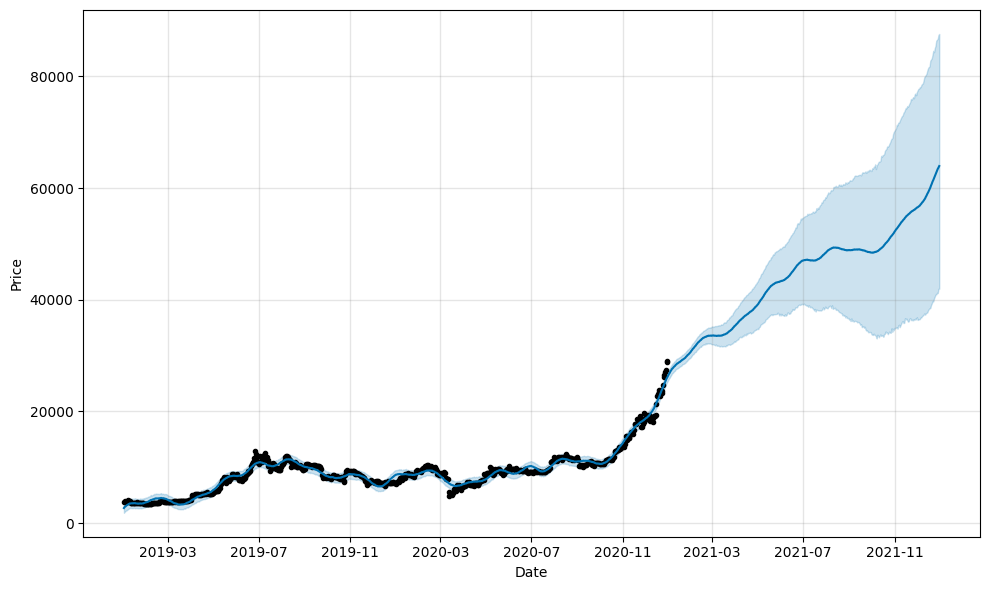

In [11]:
#visualize with Facebook internal tool
figure_1 = model.plot(forecast_prophet,
                    xlabel='Date',
                    ylabel='Price')

## Neuralprophet

In [12]:
data = prophet_df[['ds','y']]
print(data)
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 

            ds         y
0   2019-01-01   3880.15
1   2019-01-02   3961.01
2   2019-01-03   3835.86
3   2019-01-04   3874.06
4   2019-01-05   3855.39
..         ...       ...
726 2020-12-27  26249.27
727 2020-12-28  27039.45
728 2020-12-29  27360.78
729 2020-12-30  28889.61
730 2020-12-31  28972.40

[731 rows x 2 columns]


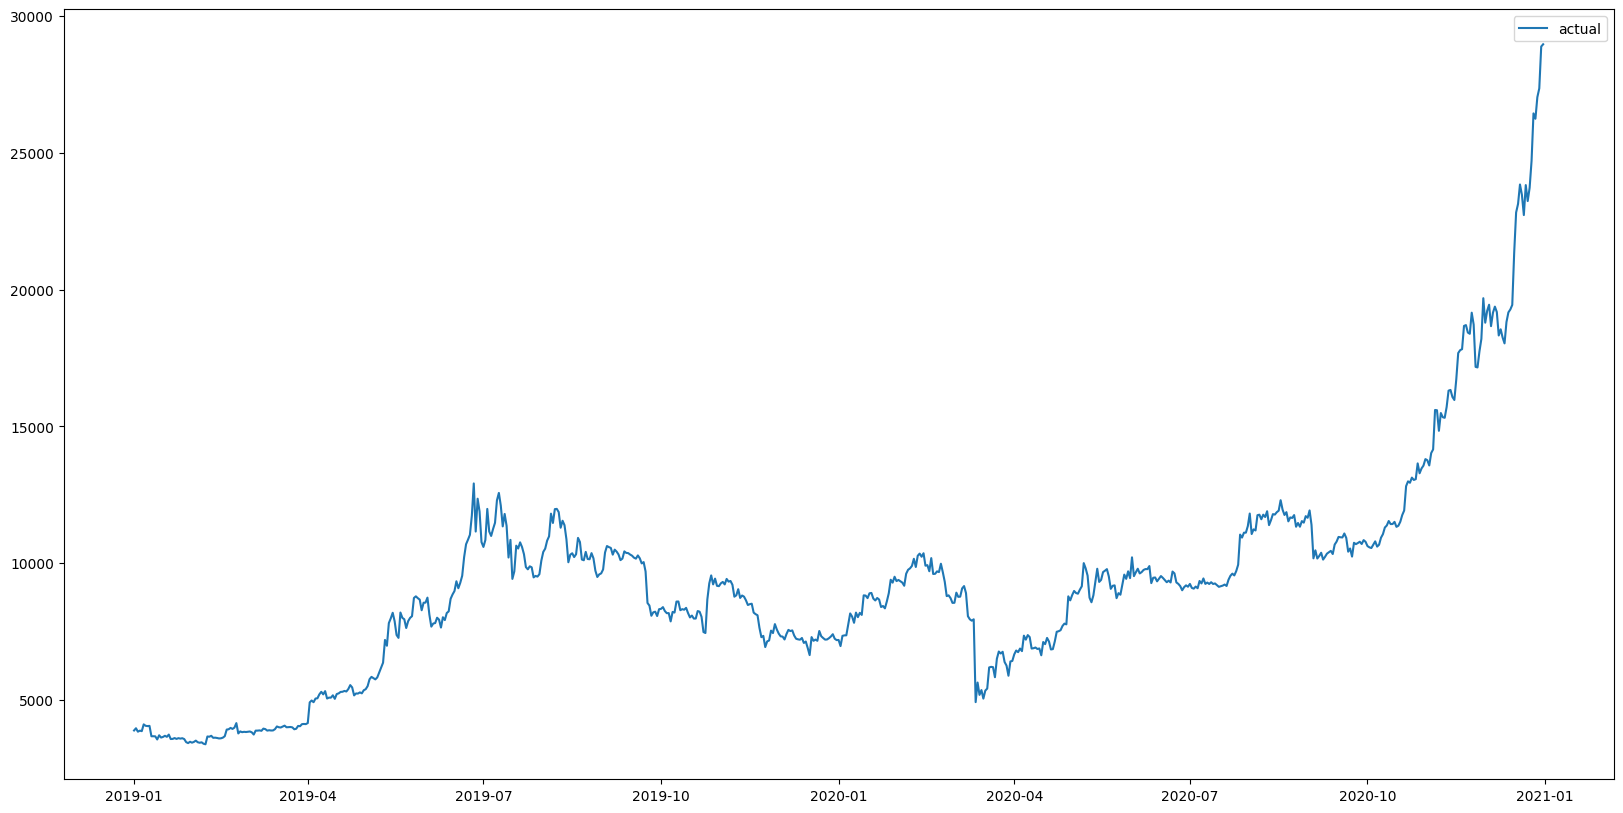

In [13]:
plt.figure(figsize=(20,10))
plt.plot(data['ds'], data['y'], label='actual')
plt.legend()
plt.show()

In [14]:
from neuralprophet import NeuralProphet

m = NeuralProphet()
neural_model = m.fit(data, freq='D', epochs=200)
future = m.make_future_dataframe(data, periods=365)
forecast_neural = m.predict(future)
forecast_neural.head()

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.863% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (46) is too small than the required number for the learning rate finder (222). The results might not be optimal.


Finding best initial lr:   0%|          | 0/222 [00:00<?, ?it/s]

2023-03-14 09:41:21.080415: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-14 09:41:35.765709: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-14 09:41:35.766151: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-14 09:41:35.766175: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like t

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.863% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 46it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2021-01-01,None,26202.349609,24583.152344,1639.042114,-19.845507
1,2021-01-02,None,26465.869141,24676.158203,1787.953247,1.757288
2,2021-01-03,None,26654.355469,24769.179688,1931.568604,-46.391354
3,2021-01-04,None,26943.615234,24862.185547,2069.585693,11.844810
4,2021-01-05,None,27155.742188,24955.199219,2201.736572,-1.193128


In [15]:
forecast_neural.tail(10)

,ds,y,yhat1,trend,season_yearly,season_weekly
355,2021-12-22,None,57559.640625,57602.453125,-97.029015,54.222633
356,2021-12-23,None,57776.695312,57695.460938,81.627052,-0.394750
357,2021-12-24,None,58028.335938,57788.468750,259.711426,-19.845507
358,2021-12-25,None,58319.921875,57881.492188,436.676910,1.757288
359,2021-12-26,None,58540.093750,57974.507812,611.985840,-46.391354
360,2021-12-27,None,58864.468750,58067.507812,785.113037,11.844810
361,2021-12-28,None,59114.882812,58160.523438,955.551331,-1.193128
362,2021-12-29,None,59430.570312,58253.539062,1122.812622,54.222633
363,2021-12-30,None,59632.593750,58346.546875,1286.433472,-0.394750
364,2021-12-31,None,59865.695312,58439.562500,1445.974121,-19.845507


In [12]:
limit = datetime(2021,12,31)
start = datetime(2021,1,1)
df_real = df[(df['timestamp'] <= limit )]
df_real = df_real[(df_real['timestamp'] >= start)]

print(df_real)

            time      high       low      open  volumefrom      volumeto  \
3821  1609459200  29666.33  28748.21  28972.40    50841.73  1.487306e+09   
3822  1609545600  33257.29  29036.26  29388.94   119214.75  3.750441e+09   
3823  1609632000  34789.34  32010.59  32203.64    93510.99  3.132759e+09   
3824  1609718400  33622.70  28493.29  33063.48   124909.68  3.901979e+09   
3825  1609804800  34487.44  29985.29  32030.55    93735.47  3.037657e+09   
...          ...       ...       ...       ...         ...           ...   
4181  1640563200  52079.46  50481.26  50790.88    21873.37  1.120188e+09   
4182  1640649600  50718.53  47317.78  50714.73    40699.40  1.985905e+09   
4183  1640736000  48145.34  46107.79  47536.39    33749.80  1.599557e+09   
4184  1640822400  47917.89  45964.28  46471.70    39311.18  1.852207e+09   
4185  1640908800  48573.22  45665.44  47129.66    34737.79  1.636014e+09   

         close conversionType conversionSymbol  timestamp  
3821  29388.94         dire

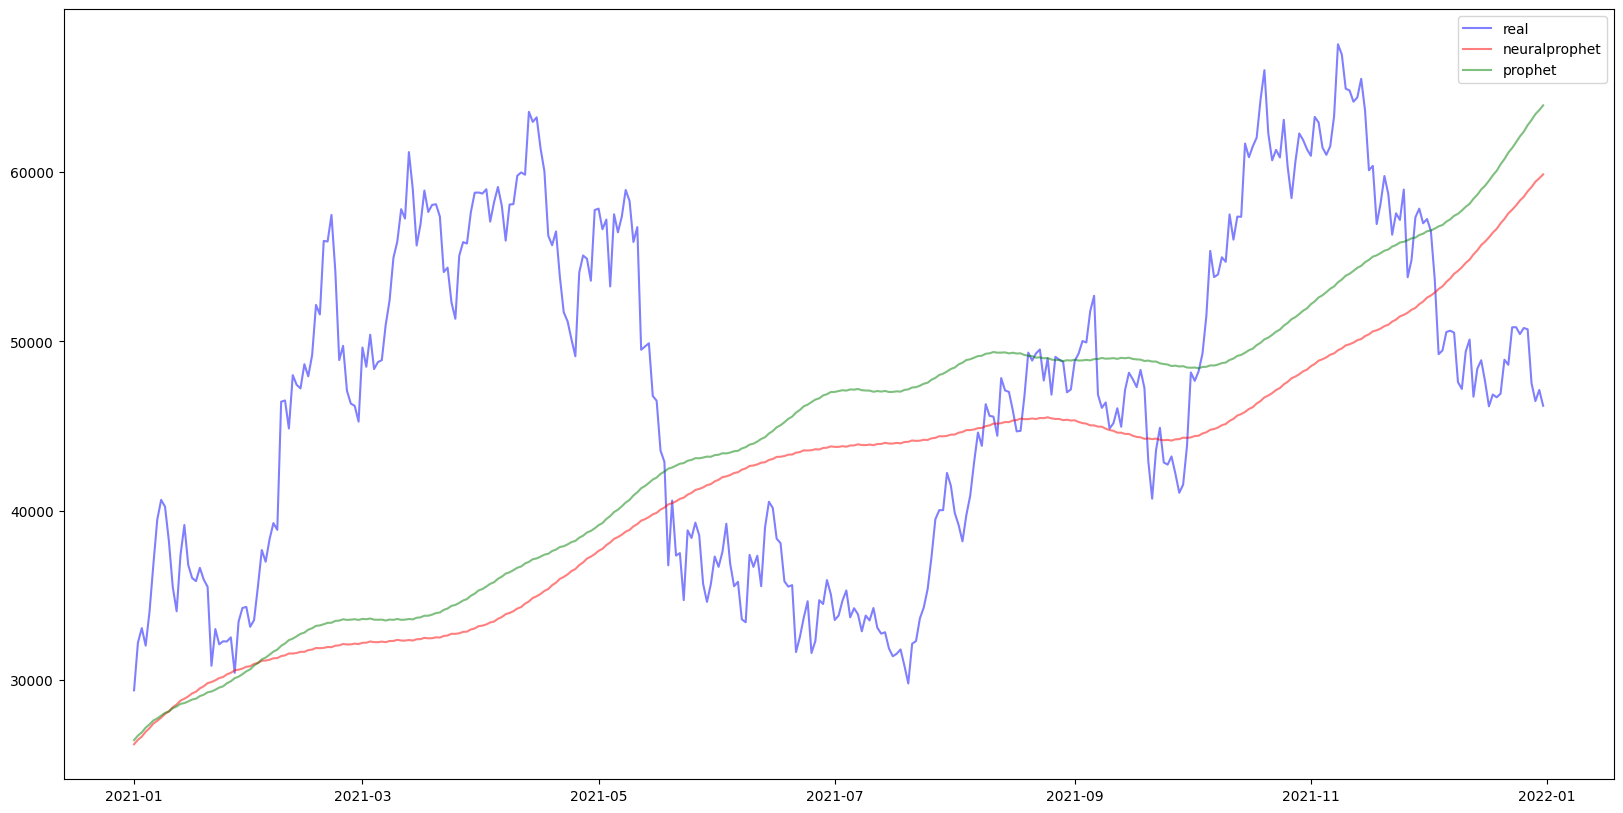

In [17]:
plt.figure(figsize=(20,10))
plt.plot(df_real['timestamp'], df_real['close'],color='blue',alpha=0.5, label="real")
plt.plot(forecast_neural['ds'], forecast_neural['yhat1'],color='red',alpha=0.5, label="neuralprophet")
plt.plot(forecast_prophet['ds'].tail(365), forecast_prophet['yhat'].tail(365), color='green',alpha=0.5, label="prophet")
plt.legend()
plt.show()

## Logartihme

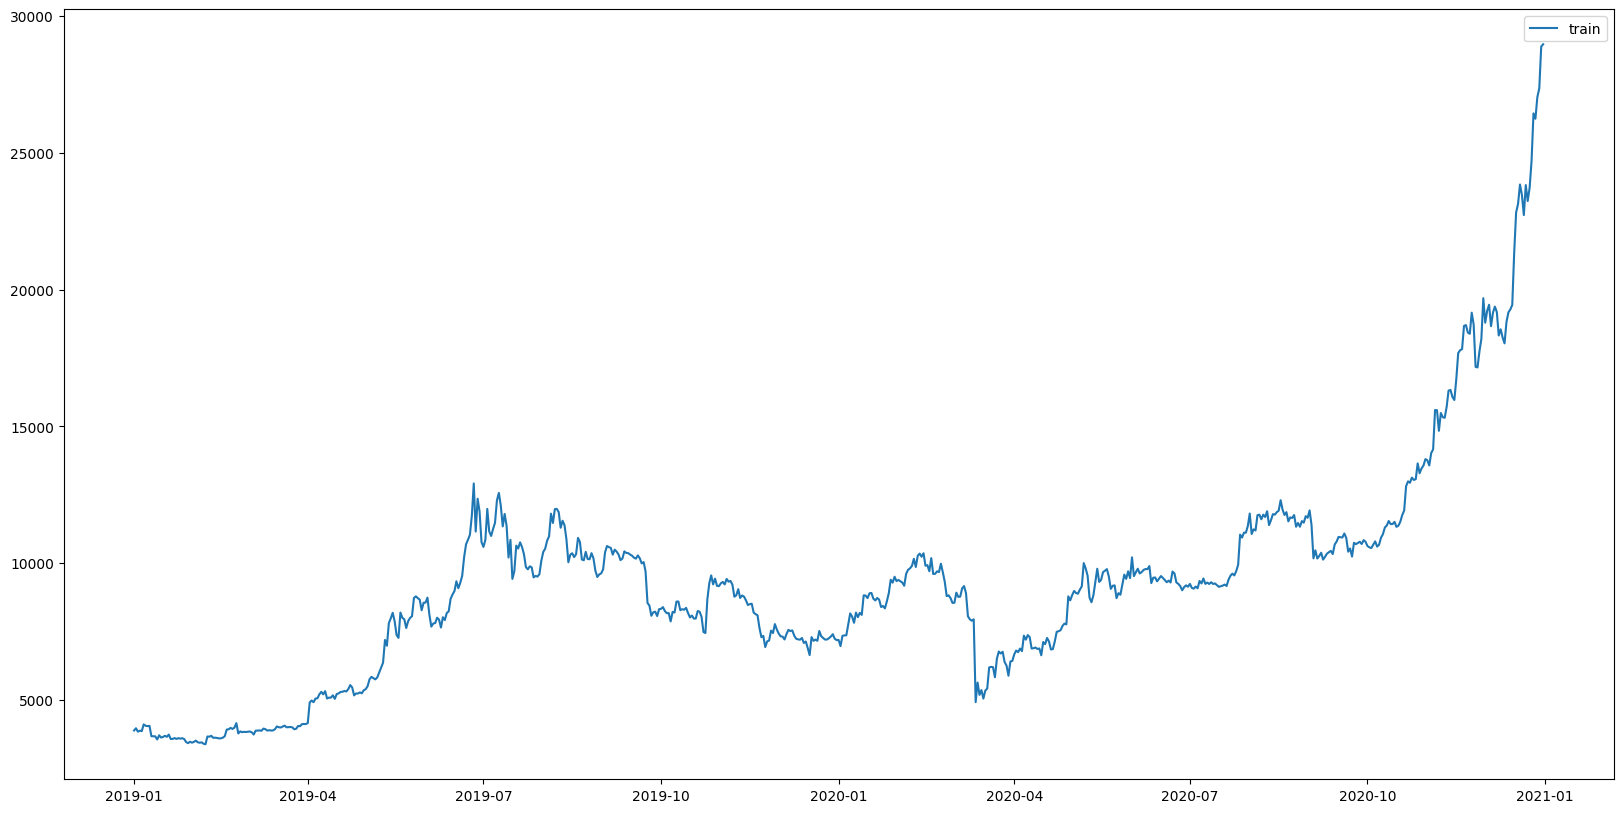

In [18]:
# Plot train bitcoin prices before applying log10
plt.figure(figsize=(20,10))
plt.plot(data['ds'], data['y'], label='train')
plt.legend()
plt.show()

In [19]:
log_data = data.copy()
log_data['y'] = log_data['y'].apply(np.log10)

In [20]:
log_data

,ds,y
0,2019-01-01,3.588849
1,2019-01-02,3.597806
2,2019-01-03,3.583863
3,2019-01-04,3.588166
4,2019-01-05,3.586068
...,...,...
726,2020-12-27,4.419117
727,2020-12-28,4.431998
728,2020-12-29,4.437128
729,2020-12-30,4.460742


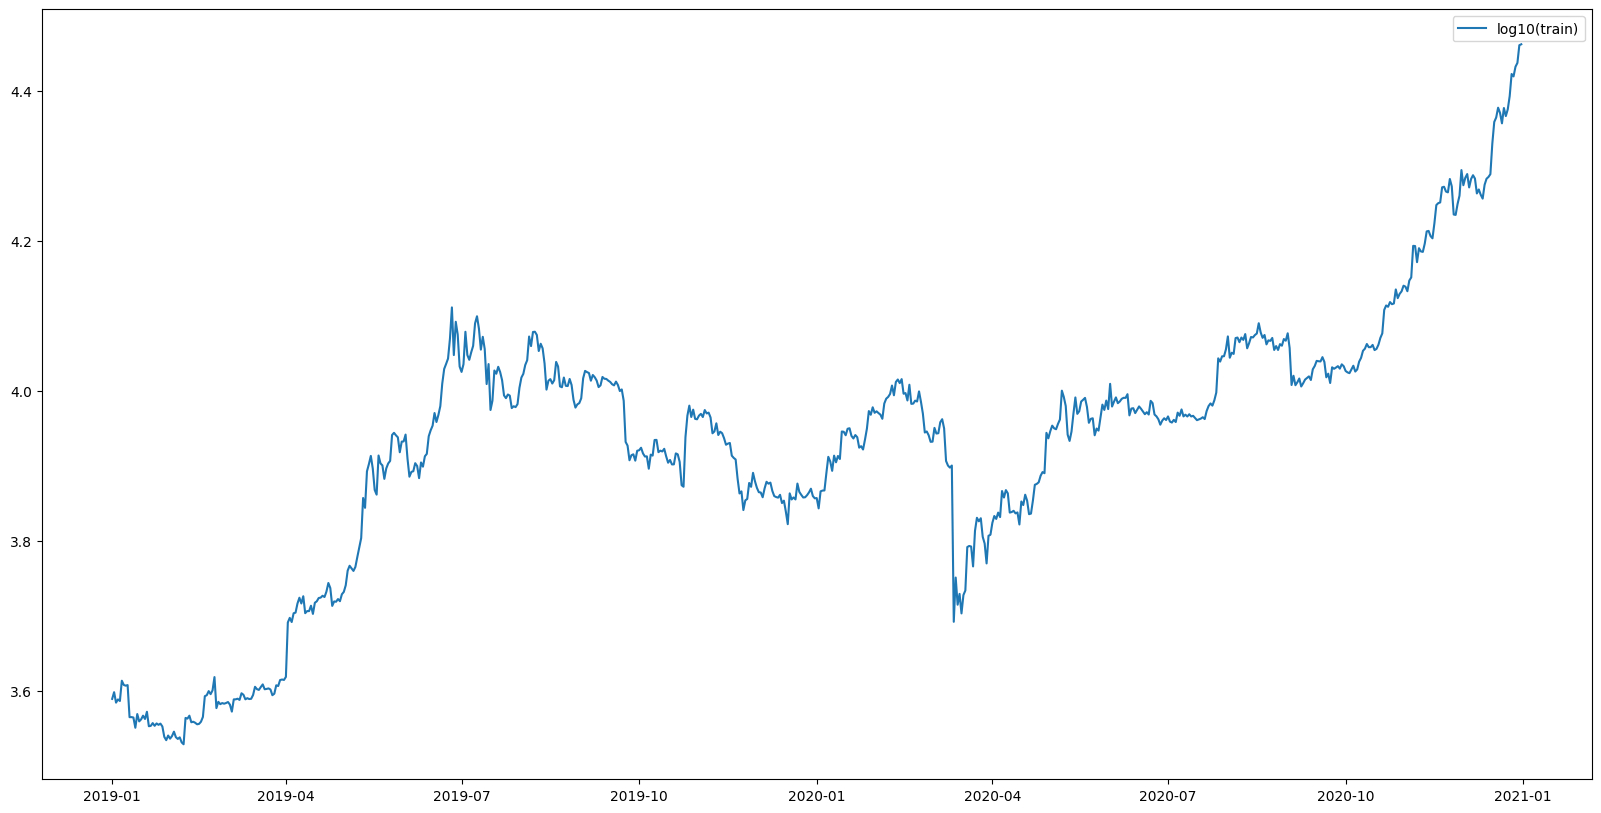

In [21]:
# Plot train bitcoin prices after applying log10
plt.figure(figsize=(20,10))
plt.plot(log_data['ds'], log_data['y'], label='log10(train)')
plt.legend()
plt.show()

In [22]:
# Create model and fit with log10 values
m = NeuralProphet()
neural_model = m.fit(log_data, freq='D', epochs=200)
future = m.make_future_dataframe(log_data, periods=365)
forecast_neural_log = m.predict(future)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.863% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (46) is too small than the required number for the learning rate finder (222). The results might not be optimal.


Finding best initial lr:   0%|          | 0/222 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.863% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 46it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [23]:
forecast_neural_log

,ds,y,yhat1,trend,season_yearly,season_weekly
0,2021-01-01,None,4.438814,4.449668,-0.010730,-0.000124
1,2021-01-02,None,4.446222,4.452777,-0.006950,0.000395
2,2021-01-03,None,4.450511,4.455886,-0.003197,-0.002177
3,2021-01-04,None,4.460132,4.458995,0.000519,0.000619
4,2021-01-05,None,4.466544,4.462103,0.004191,0.000250
...,...,...,...,...,...,...
360,2021-12-27,None,5.538759,5.568818,-0.030678,0.000619
361,2021-12-28,None,5.545275,5.571927,-0.026901,0.000250
362,2021-12-29,None,5.554093,5.575036,-0.023103,0.002161
363,2021-12-30,None,5.557728,5.578144,-0.019294,-0.001123


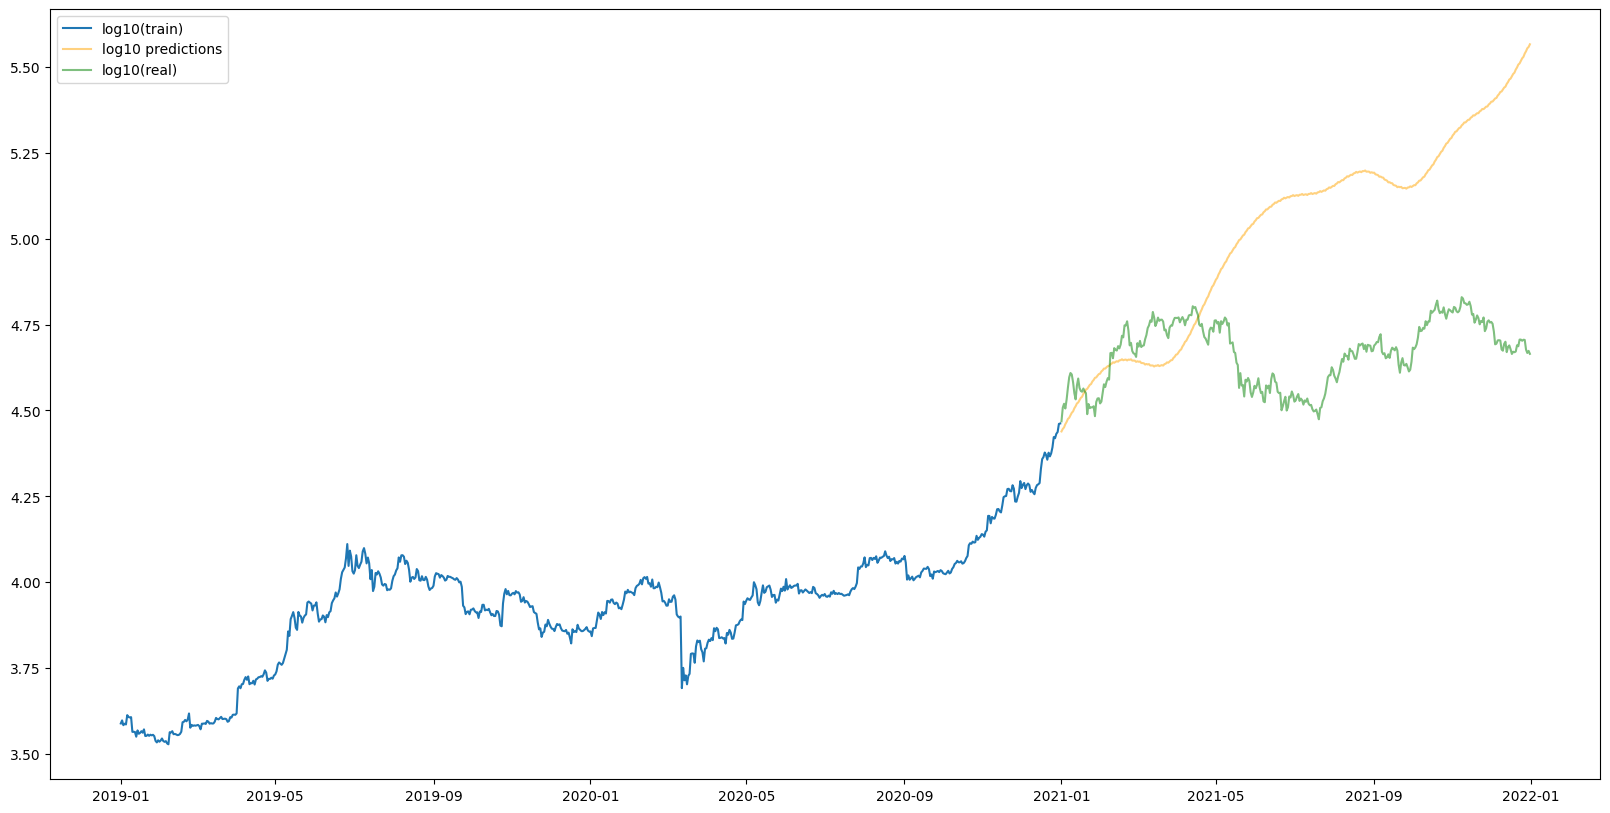

In [24]:
plt.figure(figsize=(20,10))
plt.plot(log_data['ds'], log_data['y'], label='log10(train)')
plt.plot(forecast_neural_log['ds'], forecast_neural_log['yhat1'], color='orange', alpha=0.5, label="log10 predictions")
plt.plot(df_real['timestamp'], df_real['close'].apply(np.log10), color='green',alpha=0.5, label="log10(real)")
plt.legend()
plt.show()

In [25]:
forecast_neural = forecast_neural_log[['ds','yhat1']]
forecast_neural['yhat1'] = forecast_neural_log['yhat1'].apply(lambda x: 10**x)

WARNING - (py.warnings._showwarnmsg) - /tmp/ipykernel_1385/1530006383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_neural['yhat1'] = forecast_neural_log['yhat1'].apply(lambda x: 10**x)



In [26]:
forecast_neural

,ds,yhat1
0,2021-01-01,27467.155511
1,2021-01-02,27939.736457
2,2021-01-03,28217.040112
3,2021-01-04,28849.090231
4,2021-01-05,29278.185045
...,...,...
360,2021-12-27,345747.266098
361,2021-12-28,350974.214985
362,2021-12-29,358173.425877
363,2021-12-30,361183.823018


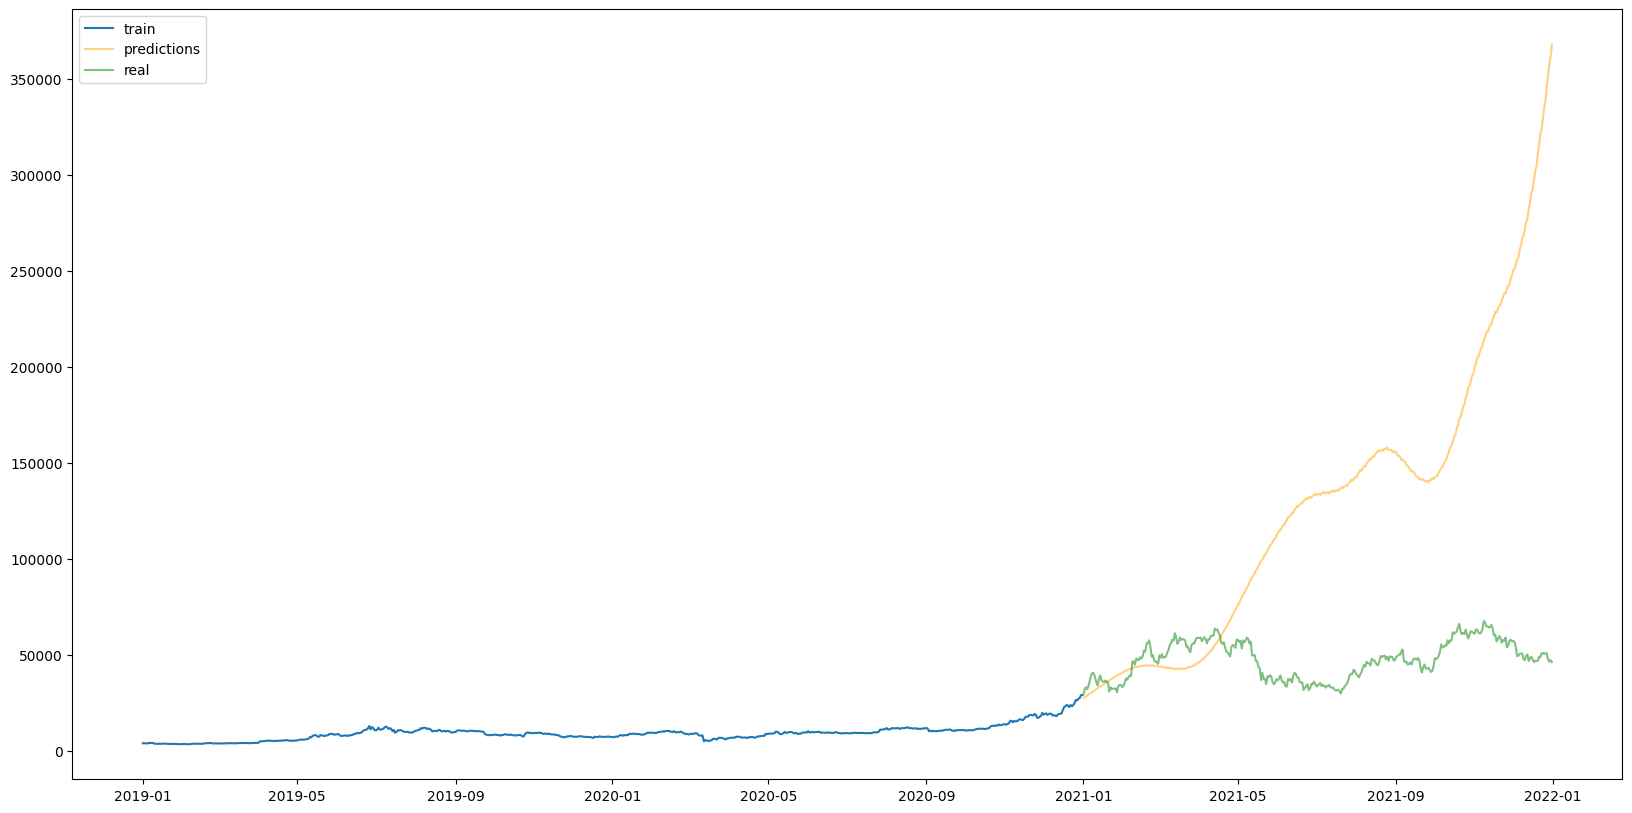

In [27]:
plt.figure(figsize=(20,10))
plt.plot(data['ds'], data['y'], label='train')
plt.plot(forecast_neural['ds'], forecast_neural['yhat1'], color='orange', alpha=0.5, label="predictions")
plt.plot(df_real['timestamp'], df_real['close'], color='green',alpha=0.5, label="real")
plt.legend()
plt.show()

## Seasonality 4 years

In [8]:
from neuralprophet import NeuralProphet

In [4]:
df

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,timestamp
0,1279324800,0.04951,0.04951,0.04951,20.00,9.902000e-01,0.04951,direct,,2010-07-17
1,1279411200,0.08585,0.05941,0.04951,75.01,5.092000e+00,0.08584,direct,,2010-07-18
2,1279497600,0.09307,0.07723,0.08584,574.00,4.966000e+01,0.08080,direct,,2010-07-19
3,1279584000,0.08181,0.07426,0.08080,262.00,2.059000e+01,0.07474,direct,,2010-07-20
4,1279670400,0.07921,0.06634,0.07474,575.00,4.226000e+01,0.07921,direct,,2010-07-21
...,...,...,...,...,...,...,...,...,...,...
4619,1678406400,20370.96000,19597.37000,20369.38000,105301.85,2.102930e+09,20207.71000,direct,,2023-03-10
4620,1678492800,20847.54000,19898.92000,20207.71000,69272.41,1.413062e+09,20610.50000,direct,,2023-03-11
4621,1678579200,22215.00000,20448.60000,20610.50000,63908.60,1.351176e+09,22180.75000,direct,,2023-03-12
4622,1678665600,24575.29000,21897.79000,22180.75000,94186.56,2.191332e+09,24205.82000,direct,,2023-03-13


In [42]:
limit = datetime(2020,12,31)
start = datetime(2010,1,1)
df_train = df[['timestamp','close']]
df_train = df_train[(df_train['timestamp'] <= limit )]
df_train = df_train[(df_train['timestamp'] >= start )]


#rename columns
df_train = df_train.rename(columns={'timestamp':'ds',
                                'close':'y'})

#check
df_train.columns

Index(['ds', 'y'], dtype='object')

In [44]:
df_train

,ds,y
0,2010-07-17,0.04951
1,2010-07-18,0.08584
2,2010-07-19,0.08080
3,2010-07-20,0.07474
4,2010-07-21,0.07921
...,...,...
3816,2020-12-27,26249.27000
3817,2020-12-28,27039.45000
3818,2020-12-29,27360.78000
3819,2020-12-30,28889.61000


In [213]:
nprophet_model = NeuralProphet(
    changepoints_range=0.8,
    n_changepoints=100,
    trend_reg=0.8,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    epochs=500
)

nprophet_model.add_seasonality(name='4 years', period=4 * 365.25, fourier_order=50)
nprophet_model.fit(df_train, freq='D')

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.974% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (120) is too small than the required number for the learning rate finder (239). The results might not be optimal.


Finding best initial lr:   0%|          | 0/239 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,7025.578125,8764.116211,0.186040,0.0,0
1,6580.971191,8211.496094,0.164515,0.0,1
2,6122.078125,7640.250000,0.143682,0.0,2
3,5684.516113,7131.019043,0.125372,0.0,3
4,5261.889160,6638.069824,0.109078,0.0,4
...,...,...,...,...,...
495,145.727402,257.650848,0.000286,0.0,495
496,145.175430,258.676361,0.000284,0.0,496
497,145.495926,260.625641,0.000285,0.0,497
498,144.947906,257.486572,0.000284,0.0,498


In [214]:
future = nprophet_model.make_future_dataframe(df_train, periods=365)
forecast_neural = nprophet_model.predict(future)
forecast_neural.tail()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.974% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 120it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_4 years
360,2021-12-27,None,66897.945312,24275.701172,42622.246094
361,2021-12-28,None,65768.125000,24286.822266,41481.300781
362,2021-12-29,None,64729.417969,24297.943359,40431.472656
363,2021-12-30,None,63790.464844,24309.068359,39481.394531
364,2021-12-31,None,62954.777344,24320.189453,38634.585938


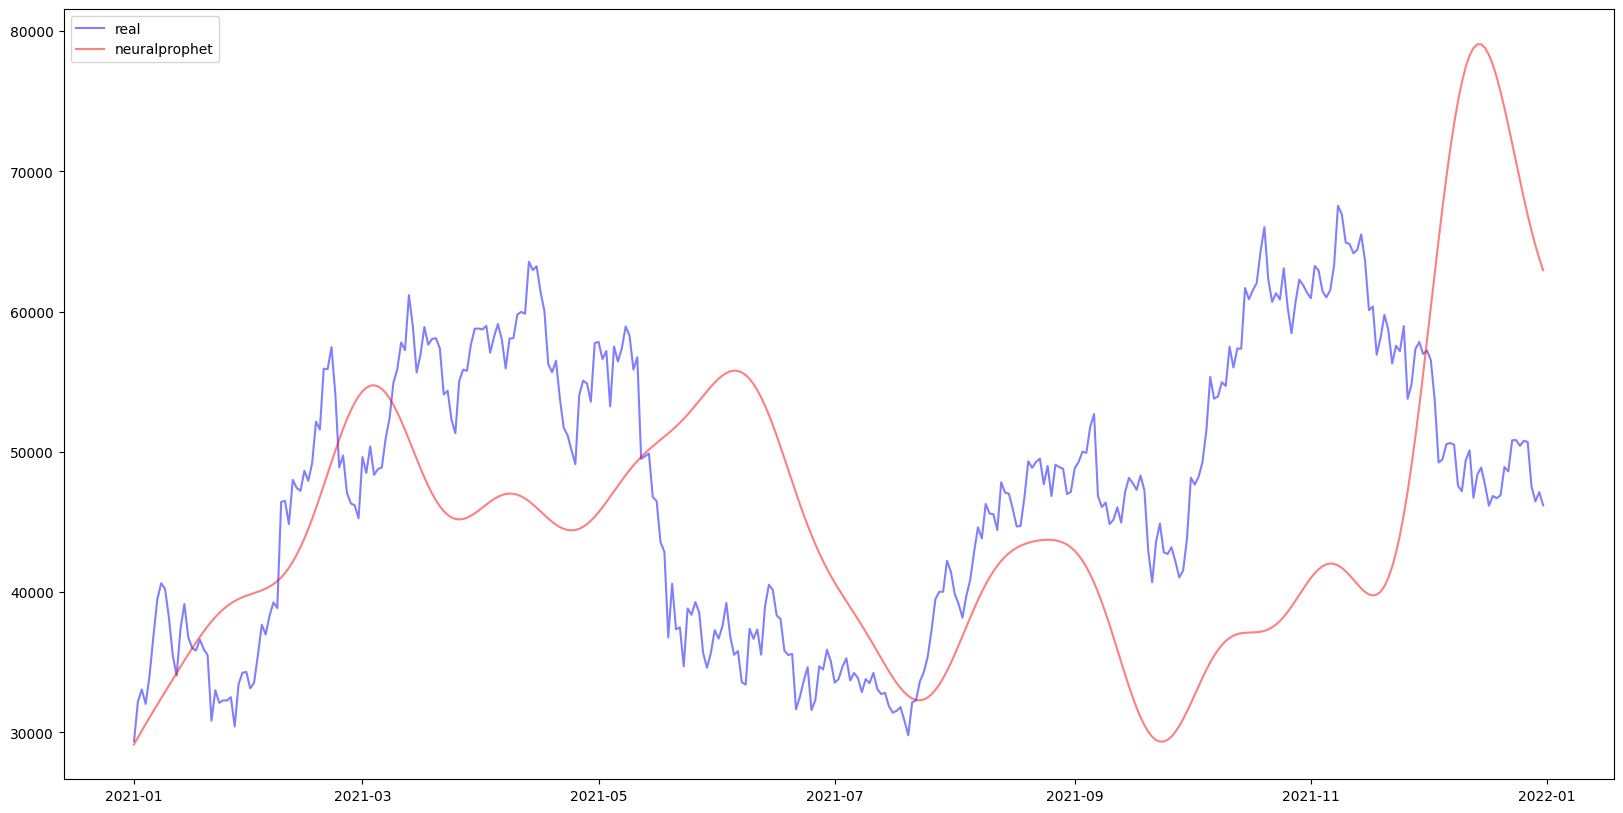

In [215]:
plt.figure(figsize=(20,10))
plt.plot(df_real['timestamp'], df_real['close'],color='blue',alpha=0.5, label="real")
plt.plot(forecast_neural['ds'], forecast_neural['yhat1'],color='red',alpha=0.5, label="neuralprophet")
plt.legend()
plt.show()